<h1><center><font color=#FF2052 size=20><br> Analyse exploratoire<br>des signalements<br>"DansMaRue" <br><br>📱<bt>

<br>L'application <b>DansMaRue</b> permet aux Parisiennes et aux Parisiens de signaler à leurs services municipaux les anomalies qu'ils constatent dans l'espace public. Il peut s'agir, par exemple, de graffitis, de nids de poule, de dégradations en tout genre ou encore d'objets abandonnés. L'application remonte directement les alertes aux services techniques en vue d'une intervention.

La ville de Paris publie ces signalements sur son site Internet d'Open Data. Nous effectuons ici une analyse exploratoire des données. Nous observons notamment le lien potentiel entre le nombre d'alertes par arrondissement et la population d'une part, et le niveau de richesse locale d'autre part.

<h1><font color=#FF2052>Plan</font></h1>
<br>
Synthèse
<ol>
<li>Importation des librairies
<li>Chargement des donn&eacute;es
<li>Exploration des donn&eacute;es
<ul>
<li>Vue d'ensemble</li>
<li>Période couverte</li>
<li>Nombre de signalements</li>
<li>Nettoyage de la base</li>
<li>Observation des variables quantitatives</li>
<li>Observation des variables qualitatives</li>
</ul></li>
<li>Croisements de données</li>
<li>Aggrégation des valeurs par arrondissement</li>
<li>Ovservation des évolutions
<ul>
<li>Evolutions à l'échelle de la capitale</li>
<li>Evolutions à l'échelle des arrondissements</li>
</ul></li>
<li>Relation avec les données démographiques et économiques des arrondissements</li>
</ol>


<h1><font color=#FF2052>Synthèse</font></h1>

- La base comporte 966 375 lignes et 16 colonnes. Chaque ligne correspond à une alerte donnée par un utilisateur. De mêmes anomalies peuvent faire l'objet de plusieurs signalements par différents utilisateurs.
<br><br>
- La base informe de la nature des problèmes (propreté, graffitis...), de leurs localisations, de leurs dates, de l'outil de signalement utilisé (application smartphone, site internet), ainsi que des services techniques intervenus.
<br><br>
- La période couverte s'étend d'avril 2021 à mai 2022, soit près de 400 jours.
<br><br>
- Le service DMR s'avère encore peu utilisé par les habitants si on considère le nombre de signalements par jour et par arrondissement. En moyenne, il y a eu 2 453 signalements quotidiens dans la capitale, soit seulement 123 par arrondissement. C'est peu sachant qu'un arrondissement parisien compte en moyenne 108 000 habitants, avec une densité de 22 700 résidents par km².
<br><br>
- Les anomalies les plus récurrentes sont les objets abandonnés (33%), suivies de près par les dégradations murales, telles les graffitis et les tags (28%). Les défauts de propreté et les véhicules génants représentent respectivement 14 et 13% des alertes. Enfin, tous les autres types d'anomalies (éclairage, eau, voirie...) forment 12% des alertes.
<br><br>
- Les arrondissements comptant le plus de signalements sont les 18e, 10e, 15e, 20e et 11e, avec entre 10 et 8% des signalements chacun. Les arrondissements du centre font l'objet de relativement peu d'alertes (moins de 5%). Le fait qu'ils soient moins peuplés et plus riches que les arrondissements périphériques consistue une explication. C'est un point que nous avons pu contrôler en confrontant les données DMR aux données démographiques et économiques locales.
<br><br>
- La base référencie 48 services d'intervention. Les trois premiers (Ramen, graffitis et DPE-STPP-DT) assurent près de 70% des intervetions.
<br><br>
- Nous avons produit un tableau avec, en lignes, les arrondissements et, en colonnes, les types d'anomalies. Cela permet d'obtenir des statistiques descriptives particulièrement interessantes. Par exemple, en matière de propreté, on observe qu'il y a en moyenne 6 852 alertes par arrondissement. Le plus touché, le 17e, en compte plus de 17 000. C'est 12 fois plus que le 6e arrondissement, qui s'avère le moins concerné avec seulement 1 425 alertes de propreté.
<br><br>
- A l'échelle des arrondissements, les différents types d'anomalies sont corrélés entre eux. Ainsi, un arrondissement ayant de nombreux signalements sur une anomalie donnée en aura également beaucoup sur les autres types d'anomalies. Deux exceptions toutefois : les graffitis et les problèmes liés aux activités commerciales sont relativement peu corrélés aux autres anomalies.
<br><br>
- En matière d'évolution des alertes dans le temps, nous ne decellons pas d'augmentation tendancielle. Les déclarations d'objets abandonnés (première source de signalements) ont baissé sur les derniers mois.

<br><h1><font color=#FF2052>1. Importation des librairies

In [69]:
%matplotlib inline

import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
# Couleurs utilisées pour les visualisation
my_colors = ['#4285f4','#ea4335','#fbbc05','#34a853',
             '#9b9b9b','#aaaaaa','#bbbbbb','#cccccc',
             '#dddddd','#eeeeee']

<bt><h1><font color=#FF2052>2. Chargement des données

Le portail Open Data de la ville de Paris (<a>opendata.paris.fr</a>) permet de récupérer la base de données contenant les signalements effectués via l'application DMR sur une période allant de J-16 mois à J-3 mois. Bien qu'il soit possible de récupérer des historiques plus anciens, nous nous limitons pour l'heure à la série la plus récente.

Lien pour récupérer la base : <br><a>https://opendata.paris.fr/explore/dataset/dans-ma-rue/information/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant</a>

Nous chargeons cette base dans un tableau Pandas et l'appelons <b>"dmr"</b>.

In [3]:
dmr = pd.read_csv('dans-ma-rue.csv', sep=';')

Nous chargeons également un jeu de données démographiques et économiques sur les 20 arrondissements parisiens. Ce jeu a été conçu à partir du Comparateur de territoires de l'Insee. Il nous permettra d'observer d'éventuels liens entre le volume des alertes DMR et la population d'une part, et le niveau de richesse des arrondissements d'autre part.

Lien des données du Comparateur de territoires de l'Insee :<br>
https://www.insee.fr/fr/statistiques/1405599?geo=COM-75101+COM-75102+COM-75103+COM-75104+COM-75105+COM-75106+COM-75107+COM-75108+COM-75109+COM-75110+COM-75111+COM-75112+COM-75113+COM-75114+COM-75115+COM-75116+COM-75117+COM-75118+COM-75119+COM-75120

Nous chargeons ces données dans un tableau Pandas et l'appelons <b>"data_arr"</b>.

In [4]:
data_arr = pd.read_excel('data_paris_arr.xlsx',index_col='Arrondissements').T

<bt><h1><font color=#FF2052>3. Exploration des données

<h2><font color=#01C7BE>Vue d'ensemble

La base comporte <b>966 375 lignes, chacune correspondant à un signalement</b>. Notons que de mêmes anomalies peuvent faire l'objet de plusieurs signalements par différents utilisateurs.

La base contient <b>16 colonnes</b>. On y découvre :
- <b>L'identifiant</b> des signalements ;
- <b>la nature des problèmes</b> (types et sous-types) ;
- <b>leurs localisations</b> : arrondissements, conseils de quartier, rues et numéros de rue, géolocalisation GPS ;
- <b>leurs dates de signalement</b> : jours, mois et années ;
- <b>l'outil utilisé</b> : <i>smartphone</i> ou site internet ;
- <b>le service technique</b> intervenu pour résoudre le problème.

In [5]:
dmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966375 entries, 0 to 966374
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID DECLARATION         966375 non-null  int64 
 1   TYPE DECLARATION       966375 non-null  object
 2   SOUS TYPE DECLARATION  966375 non-null  object
 3   ADRESSE                966374 non-null  object
 4   CODE POSTAL            966375 non-null  int64 
 5   VILLE                  966375 non-null  object
 6   ARRONDISSEMENT         966375 non-null  int64 
 7   CONSEIL DE QUARTIER    966320 non-null  object
 8   DATE DECLARATION       966375 non-null  object
 9   ANNEE DECLARATION      966375 non-null  int64 
 10  MOIS DECLARATION       966375 non-null  int64 
 11  OUTIL SOURCE           966375 non-null  object
 12  INTERVENANT            964450 non-null  object
 13  ID_DMR                 966375 non-null  object
 14  geo_shape              966375 non-null  object
 15  

<br>On présente ci-dessous un aperçu des 5 premières lignes de la base.

In [6]:
dmr.head()

,ID DECLARATION,TYPE DECLARATION,SOUS TYPE DECLARATION,ADRESSE,CODE POSTAL,VILLE,ARRONDISSEMENT,CONSEIL DE QUARTIER,DATE DECLARATION,ANNEE DECLARATION,MOIS DECLARATION,OUTIL SOURCE,INTERVENANT,ID_DMR,geo_shape,geo_point_2d
0,4879,Propreté,Déchets et/ou salissures divers,"259 Avenue Daumesnil, 75012 PARIS",75012,Paris 12,12,BEL - AIR SUD,2021-05-02,2021,5,IOPage DMR Paris.fr application,DPE-STPP-DT,A2021E004879,"{""coordinates"": [2.404446004263793, 48.8367600...","48.836760001049235,2.404446004263793"
1,5173,"Graffitis, tags, affiches et autocollants",Graffitis sur rideau métallique,"9 Rue Pinel, 75013 PARIS",75013,Paris 13,13,SALPETRIERE - AUSTERLITZ,2022-02-02,2022,2,Androï,graffitis,G2022B005173,"{""coordinates"": [2.360714394512343, 48.8335379...","48.83353799808813,2.360714394512343"
2,6707,"Graffitis, tags, affiches et autocollants",Graffitis sur rideau métallique,"22 Rue de la Fidélité, 75010 PARIS",75010,Paris 10,10,PORTE SAINT-DENIS - PARADIS,2021-05-03,2021,5,Androï,graffitis,G2021E006707,"{""coordinates"": [2.3558310045365403, 48.874559...","48.874559998533385,2.3558310045365403"
3,7089,"Graffitis, tags, affiches et autocollants","Graffitis sur mur, façade sur rue, pont","4 Rue Buot, 75013 PARIS",75013,Paris 13,13,BUTTES AUX CAILLES - DAVIEL - BOUSSINGAULT,2022-04-04,2022,4,Androï,graffitis,G2022D007089,"{""coordinates"": [2.349083196712055, 48.8271030...","48.82710300257509,2.349083196712055"
4,55704,Propreté,Déchets et/ou salissures divers,"69 Boulevard Saint-Jacques, 75014 PARIS",75014,Paris 14,14,MONTSOURIS - DAREAU,2022-05-21,2022,5,Androï,DPE-STPP-DT,G2022E055704,"{""coordinates"": [2.335261001568566, 48.8331999...","48.83319999659263,2.335261001568566"


<br><h2><font color=#01C7BE>Période couverte

La base couvre la période allant <b>du samedi 25 avril 2021 au mardi 24 mai 2022</b>, soit une période de <b>394 jours</b> (13 mois).

Le format initial de la colonne DATE DECLARATION est textuel (format <i>"object"</i>). Pour une meilleure exploitation de cette information, <b>nous la formatons en tant que date</b> (format <i>"datetime64"</i>).

In [7]:
dmr['DATE DECLARATION'] = pd.to_datetime(dmr['DATE DECLARATION'])

debut = dmr['DATE DECLARATION'].min()
fin = dmr['DATE DECLARATION'].max()
periode_jours = fin-debut

print('Date de début : ', debut.strftime('%B %d, %Y'), ', it is a',debut.strftime('%A'))
print('Date de fin : ', fin.strftime('%B %d, %Y'),', it is a',fin.strftime('%A'))
print('Nombre de jours :', periode_jours)

Date de début :  April 25, 2021 , it is a Sunday
Date de fin :  May 24, 2022 , it is a Tuesday
Nombre de jours : 394 days 00:00:00


<br><h2><font color=#01C7BE>Nombre de signalements

Forte de <b>966 375 signalements en 13 mois</b>, la base peut paraître volumineuse. Pour autant, l'application DMR s'avère peu utilisée si on considère le nombre de signalements par jour et par arrondissement.

<b>En moyenne, il y a eu 2 453 signalements quotidiens dans la capitale, soit seulement 123 par arrondissement</b>. C'est peu sachant qu'un arrondissement parisien compte en moyenne 108 000 habitants, avec une densité de 22 700 résidents par km² (Insee, 2019).

In [8]:
print('Population moyenne des arrondissements parisiens :', round(data_arr.loc[:,'Population, 2019'].mean()))
print('Densité moyenne des arrondissements parisiens :', round(data_arr.loc[:,'Densité de la population, 2019'].mean()))

Population moyenne des arrondissements parisiens : 108271
Densité moyenne des arrondissements parisiens : 22696


<bt><h2><font color=#01C7BE>Nettoyage de la base

<b>Contrôle des doublons</b>

Nous nous assurons ici que la base ne comporte pas de lignes en doublon. Celle-ci compte 966 375 lignes mais seulement 91 623 identifiants uniques pour les déclarations (ID_DECLARATION). Il n'y a en revanche aucun doublon sur les identifiants DMR (ID_DMR), ce qui indique qu'il n'y a effectivement aucune répétition de ligne.

In [9]:
id_decl_uniques = dmr['ID DECLARATION'].unique().shape[0]
id_dmr_uniques = dmr['ID_DMR'].unique().shape[0]

print('Taille de la base de données :', dmr.shape[0], 'lignes')
print('Identifiants déclarations uniques :', id_decl_uniques)
print('Identifiants DMR uniques :', id_dmr_uniques)

print('='*24)
 
print('Lignes en doublon :', dmr[dmr.duplicated()].shape[0])

Taille de la base de données : 966375 lignes
Identifiants déclarations uniques : 91623
Identifiants DMR uniques : 966375
Lignes en doublon : 0


<br><b>Suppression des colonnes non utiles à l'analyse</b>
    
Les colonnes ID DECLARATION et ID_DMR ne sont pas utiles à notre analyse. Nous les retirons.

In [10]:
dmr.drop(['ID DECLARATION','ID_DMR'], inplace=True, axis=1)

Les colonnes CODE POSTAL, VILLE et ARRONDISSEMENT sont redondantes. Nous ne conservons donc que ARRONDISSEMENT.

In [11]:
print('Code postal')
print(dmr['CODE POSTAL'].unique())
print('='*24)

print('Ville')
print(dmr['VILLE'].unique())
print('='*24)

print('Arrondissement')
print(dmr['ARRONDISSEMENT'].unique())

# Suppression des colonnes CODE POSTAL et VILLE
dmr.drop(['CODE POSTAL','VILLE'], inplace=True, axis=1)

Code postal
[75012 75013 75010 75014 75008 75015 75019 75017 75001 75005 75018 75020
 75016 75009 75011 75006 75007]
Ville
['Paris 12' 'Paris 13' 'Paris 10' 'Paris 14' 'Paris 8' 'Paris 15'
 'Paris 19' 'Paris 17' 'Paris 1' 'Paris 5' 'Paris 18' 'Paris 20'
 'Paris 16' 'Paris 9' 'Paris 11' 'Paris 6' 'Paris 7']
Arrondissement
[12 13 10 14  8 15 19 17  1  4  2  5 18 20 16  9 11  6  3  7]


Les colonnes DATE DECLARATION, ANNEE DECLARATION et MOIS DECLARATION sont redondantes. Nous ne conservons que la première.

In [12]:
dmr.drop(['ANNEE DECLARATION','MOIS DECLARATION'], inplace=True, axis=1)

<br><b>Observation des valeurs manquantes

Il y a très peu de valeurs manquantes. Seul 0,2% de la colonne INTERVENANT est manquante. On ne compte que 55 conseils de quartier non renseignés (0,01%). Une seule adresse est inconnue. Ces quelques et rares valeurs manquantes n'appellent pas à un retraitement particulier de la base.

In [13]:
def valeurs_manquantes(dmr):
    total = dmr.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(dmr)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','%'])

In [14]:
valeurs_manquantes(dmr)

,Total,%
INTERVENANT,1925,0.20
CONSEIL DE QUARTIER,55,0.01
ADRESSE,1,0.00
TYPE DECLARATION,0,0.00
SOUS TYPE DECLARATION,0,0.00
ARRONDISSEMENT,0,0.00
DATE DECLARATION,0,0.00
OUTIL SOURCE,0,0.00
geo_shape,0,0.00
geo_point_2d,0,0.00


<h2><font color=#01C7BE>Observation des variables quantitatives

La base ne compte pas de variable réellement quantitative. Les variables avec un format numérique (<i>"int64"</i>) sont en réalité catégorielles (ARRONDISSEMENT, CODE POSTAL, ANNEE, MOIS).

In [15]:
dmr.describe().round()

,ARRONDISSEMENT
count,966375.0
mean,13.0
std,5.0
min,1.0
25%,10.0
50%,13.0
75%,18.0
max,20.0


<h2><font color=#01C7BE>Observation des variables qualitatives

<b>Observation des TYPES des problèmes signalés

- Les <b>objets abandonnés</b> sont la première source de signalements. Ils représentent <b>une alerte sur trois</b> (33%).
- Les <b>dégradations murales</b> (graffitis, tags, affiches et autocollants) représentent eux <b>28%</b> des déclarations.
- Les <b> défauts de propreté</b> font l'objet de <b>14%</b> des signalements.
- Les <b>véhicules</b> générent <b>13%</b> des signalements.
- Les <b>autres anomalies</b> (éclairage, eau, voirie...) représentent <b>12%</b> de la base.

In [16]:
def variables_cat(col):
    print(col, '/ Nombre : ',len(dmr[col].unique()))
    total = dmr[col].value_counts()
    percent = round(total/len(dmr)*100)
    return pd.concat([total, percent], axis=1, keys=['Total','%'])

In [17]:
type_decl = variables_cat('TYPE DECLARATION')
type_decl

TYPE DECLARATION / Nombre :  10


,Total,%
Objets abandonnés,316571,33.0
"Graffitis, tags, affiches et autocollants",274004,28.0
Propreté,137041,14.0
"Autos, motos, vélos...",123866,13.0
Activités commerciales et professionnelles,38219,4.0
Voirie et espace public,33439,3.0
Mobiliers urbains,19089,2.0
"Arbres, végétaux et animaux",10614,1.0
Éclairage / Électricité,9358,1.0
Eau,4174,0.0


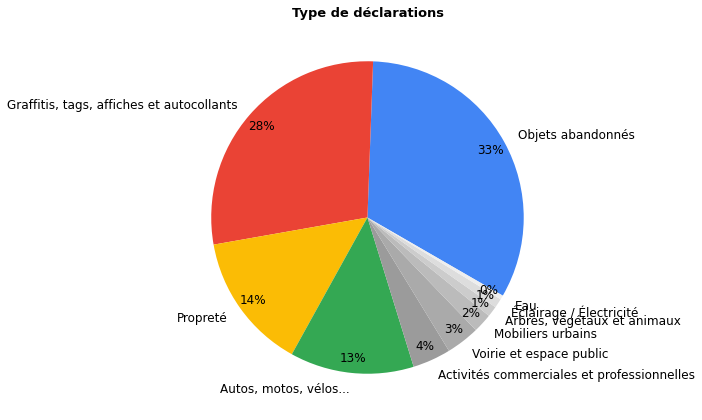

In [18]:
plt.figure(figsize=(7,10))

plt.title('Type de déclarations',
          fontsize=13,
          fontweight='bold')
              
plt.pie(type_decl['Total'],
        labels=type_decl.index,
        colors=my_colors,
        autopct='%.0f%%', pctdistance=0.9,
        textprops={"fontsize":12},
        startangle=330)

plt.show()

<br><b>Observation des SOUS-TYPES des problèmes déclarés

Il y a 342 sous-types de signalements différents.

Les graffitis (hors tags, affiches et autocollants) représentent à eux seuls plus d'un dixième de la base (13%).

In [19]:
variables_cat('SOUS TYPE DECLARATION').head(10)

SOUS TYPE DECLARATION / Nombre :  342


,Total,%
Autres objets encombrants abandonnés,245246,25.0
"Graffitis sur mur, façade sur rue, pont",125298,13.0
Déchets et/ou salissures divers,79933,8.0
Automobile ou autre véhicule motorisé en stationnement gênant,57284,6.0
"Affiches, autocollants ou graffitis sur autres supports:Autre mobilier urbain",46660,5.0
Deux-roues motorisé en stationnement gênant,33268,3.0
Graffitis sur rideau métallique,24768,3.0
Gravats ou déchets de chantier,18897,2.0
Étalages et terrasses à usage commercial:Gêne à la circulation / Étalage excessif,17902,2.0
"[] Affiches ou autocollants sur mur, façade sur rue, pont (surface inférieure à 1 m²)",16423,2.0


<br><b>Observation de la répartition par arrondissement

Les arrondissements comptant le plus de signalements sont les :
- <b>18<sup>e</sup></b>  (10%),
- <b>10<sup>e</sup></b>  (9%)
- <b>15<sup>e</sup>, 20<sup>e</sup> et 11<sup>e</sup></b>  (8%).

<b>Les arrondissements du centre font l'objet de relativement peu d'alertes</b> (moins de 5%). Le fait qu'ils soient moins peuplés et plus riches que les arrondissements périphériques pourrait consistuer une explication. C'est un point que nous contrôlerons par la suite.

In [20]:
par_arr = variables_cat('ARRONDISSEMENT')
par_arr

ARRONDISSEMENT / Nombre :  20


,Total,%
18,96682,10.0
10,86422,9.0
15,81788,8.0
20,80704,8.0
11,78780,8.0
17,70820,7.0
19,68859,7.0
12,57974,6.0
13,50340,5.0
16,47185,5.0


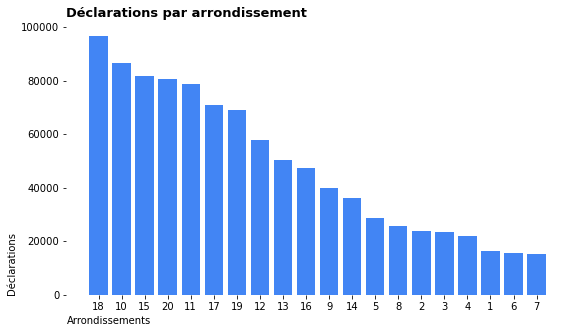

In [21]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)

ax.bar(range(len(par_arr['Total'])), par_arr['Total'], color='#4285f4')

tick_positions = range(0,len(par_arr))
ax.set_xticks(tick_positions)
ax.set_xticklabels(par_arr.index)
plt.xlabel('Arrondissements', loc='left')
plt.ylabel('Déclarations', loc='bottom')

ax.spines[['top','right','bottom','left']].set_visible(False)
# ax.grid(axis='y')

plt.title('Déclarations par arrondissement',
          fontsize=13,
          fontweight='bold',
          loc='left')

plt.show()

<br><b>Observation de la répartition par Conseil de Quartier

In [22]:
variables_cat('CONSEIL DE QUARTIER').head()

CONSEIL DE QUARTIER / Nombre :  126


,Total,%
PORTE SAINT-DENIS - PARADIS,27765,3.0
REPUBLIQUE - SAINT-AMBROISE,21719,2.0
BELLEVILLE,21316,2.0
BELLEVILLE - SAINT-MAUR,19250,2.0
CHATEAU D'EAU - LANCRY,19131,2.0


<br><b>Observation des outils utilisés pour réaliser les signalements

Dans la moitié des cas (53%), les déclarations sont effectuées via l'application Androï.

In [23]:
outil_source = variables_cat('OUTIL SOURCE')
outil_source

OUTIL SOURCE / Nombre :  4


,Total,%
Androï,510316,53.0
IOPage DMR Paris.fr application,342524,35.0
Page DMR Paris.fr,109203,11.0
Back Office,4332,0.0


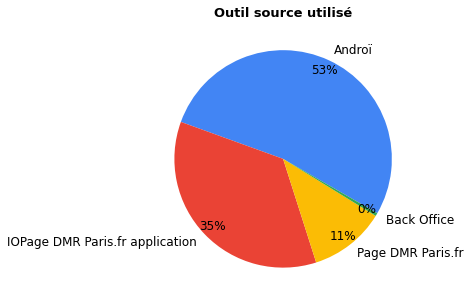

In [24]:
plt.figure(figsize=(5,5))

plt.title('Outil source utilisé',
          fontsize = 13,
          fontweight = 'bold')
                
plt.pie(outil_source['Total'],
        labels = outil_source.index,
        colors = my_colors,
        autopct = '%.0f%%',
        pctdistance = 0.9,
        textprops = {"fontsize":12},
        startangle = 330)

plt.show()

<b>Observation des intervenants

La base référencie 48 services d'intervention.

Les trois premiers sont :
- Ramen
- graffitis
- DPE-STPP-DT (Direction de la propreté et de l'eau, Service Technique de la Propreté de Paris)
               
Ensemble, ils concentrent 69% des interventions.

In [25]:
variables_cat('INTERVENANT').head(10)

INTERVENANT / Nombre :  48


,Total,%
Ramen en tant que prestataire de DansMaRue,274791,28.0
graffitis,215183,22.0
DPE-STPP-DT,188105,19.0
DPMP-SCOP,90596,9.0
DPE-STPP-Fonctionnelle,51263,5.0
DPMP avec un découpage en circonscription,48805,5.0
DVD,35530,4.0
DPMP-UEV,15151,2.0
Prestataire de la DVD opérant sur tout Paris (Éclairage et signalisation lumineuse),11570,1.0
SMEP,9148,1.0


In [26]:
# Cumul des 3 premiers intervenants
variables_cat('INTERVENANT').iloc[:3].sum()

INTERVENANT / Nombre :  48


Total    678079.0
%            69.0
dtype: float64

<br><h1><font color=#FF2052>4. Croisements de données

Nous établissons la fonction <b>group()</b>. Celle-ci automatise la création d'un dataframe avec en index une zone géographique et en colonne le total des occurences et la répartition en pourcentage.

In [27]:
def group(typ_decl, decl, zone):
    
    print('Type de déclaration : ',typ_decl)
    print('Element signalé : ',decl)
    print('Groupé par : ',zone)
    
    total = dmr[dmr[typ_decl]==decl]\
                .groupby(zone).count()\
                .iloc[:,1]\
                .sort_values(ascending=False)

    percent = (total/total.sum()*100).round()

    return pd.concat([total, percent],
                     axis=1,
                     keys=['Total','%'])

<br><b>Dans quels arrondissements y a t-il le plus de graffitis déclarés ?

Nous utilisons notre fonction <b>group()</b> pour produire ici un dataframe avec les arrondissements en index et les déclarations de graffitis en colonne. Les 10ème, 11ème et 18ème arrondissements sont ceux comptant le plus d'alertes en la matière, avec respectivement 16, 15 et 12% des déclarations.

In [28]:
group('SOUS TYPE DECLARATION', 'Graffitis sur mur, façade sur rue, pont', 'ARRONDISSEMENT')

Type de déclaration :  SOUS TYPE DECLARATION
Element signalé :  Graffitis sur mur, façade sur rue, pont
Groupé par :  ARRONDISSEMENT


,Total,%
ARRONDISSEMENT,,
10,19635,16.0
11,18855,15.0
18,14437,12.0
20,8855,7.0
19,8323,7.0
3,6104,5.0
13,5885,5.0
12,5860,5.0
15,5482,4.0


<br><b>Dans quels arrondissements y a t-il le plus d'objets abandonnés déclarés ?

In [29]:
group('TYPE DECLARATION', 'Objets abandonnés', 'ARRONDISSEMENT')

Type de déclaration :  TYPE DECLARATION
Element signalé :  Objets abandonnés
Groupé par :  ARRONDISSEMENT


,Total,%
ARRONDISSEMENT,,
15,45311,14.0
18,37811,12.0
20,35851,11.0
19,26448,8.0
17,26189,8.0
11,23532,7.0
10,22259,7.0
12,19604,6.0
13,19142,6.0


In [30]:
group('TYPE DECLARATION', 'Propreté', 'ARRONDISSEMENT')

Type de déclaration :  TYPE DECLARATION
Element signalé :  Propreté
Groupé par :  ARRONDISSEMENT


,Total,%
ARRONDISSEMENT,,
17,17118,12.0
19,12086,9.0
20,11803,9.0
18,10955,8.0
16,10481,8.0
15,8943,7.0
12,7825,6.0
13,7668,6.0
10,7152,5.0


<br><h1><font color=#FF2052>5. Aggrégation des valeurs par arrondissement

<b>Déclarations par arrondissement

Pour obtenir une vision d'ensemble de la situation, nous produisons un tableau Pandas avec en lignes les arrondissements et en colonnes l'ensemble des types d'anomalies.

In [31]:
dmr_arr = pd.pivot_table(dmr[['ARRONDISSEMENT','TYPE DECLARATION']],
                         index='ARRONDISSEMENT',
                         columns='TYPE DECLARATION',
                         aggfunc=len)
dmr_arr

TYPE DECLARATION,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité
ARRONDISSEMENT,,,,,,,,,,
1,1861,166,2521,119,4947,580,2393,2558,932,258
2,3344,185,3374,72,7707,477,5023,2696,698,147
3,1202,174,3633,105,11995,428,2697,2407,753,190
4,1320,370,3013,103,8213,695,3049,3913,1065,294
5,1224,244,5545,183,11947,941,4698,2142,1424,296
6,1184,126,2501,83,5055,414,4043,1425,684,124
7,575,268,2659,81,4873,443,1667,3444,1005,309
8,1123,305,6525,100,4163,662,4118,6766,1448,485
9,3311,186,6916,139,14285,767,8132,4586,1185,257


Les statistiques descriptives sont ici particulièrement interessantes. Elles permettent notamment d'observer rapidement les écarts d'alertes entre arrondissements. Par exemple, en matière de propreté, il y a en moyenne 6 852 alertes par arrondissement. Le plus touché en compte plus de 17 000 (le 17e), soit 12 fois plus que le moins touché (le 6e avec 1 425 alertes).

In [32]:
dmr_arr.describe().round()

TYPE DECLARATION,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,1911.0,531.0,6193.0,209.0,13700.0,954.0,15829.0,6852.0,1672.0,468.0
std,1298.0,326.0,2580.0,115.0,9659.0,385.0,13436.0,4144.0,778.0,257.0
min,575.0,126.0,2501.0,72.0,4163.0,414.0,1667.0,1425.0,684.0,124.0
25%,1169.0,230.0,3568.0,104.0,7044.0,642.0,4099.0,3257.0,1050.0,285.0
50%,1281.0,473.0,6720.0,200.0,11321.0,970.0,12302.0,6790.0,1532.0,462.0
75%,2818.0,846.0,8455.0,281.0,16104.0,1280.0,24196.0,9328.0,2132.0,553.0
max,4880.0,1117.0,9815.0,496.0,38863.0,1684.0,45311.0,17118.0,3268.0,1138.0


In [33]:
print('Arrondissement avec le plus d\'alertes de propreté :', dmr_arr['Propreté'].idxmax(),'ème')
print('Arrondissement avec le moins d\'alertes de propreté :', dmr_arr['Propreté'].idxmin(),'ème')
print('='*24)

print('Ratio entre l\'arrondissement ayant le plus d\'alertes de Propreté et celui en ayant le moins : x',
      round(dmr_arr['Propreté'].max()/dmr_arr['Propreté'].min()))

Arrondissement avec le plus d'alertes de propreté : 17 ème
Arrondissement avec le moins d'alertes de propreté : 6 ème
Ratio entre l'arrondissement ayant le plus d'alertes de Propreté et celui en ayant le moins : x 12


Nous nous posons la question des corrélations entre les différentes alertes à l'échelle des arrondissements. Autrement dit, les arrondissements faisant l'objet de nombreux signalements sur une anomalie donnée auront-t-ils également de nombreux  signalements sur un ou plusieurs autres types d'anomalies ? Pour y répondre, nous produisons une matrice des coefficients de corrélation. 

La réponse est "oui" : les différents types d'anomalies sont très corrélés entre eux. Deux exceptions toutefois :
- Les graffitis, qui représentent un tiers de la base, sont relativement peu corrélés aux autres anomalies.
- Il en va de même pour les activités commerciales et professionnelles.

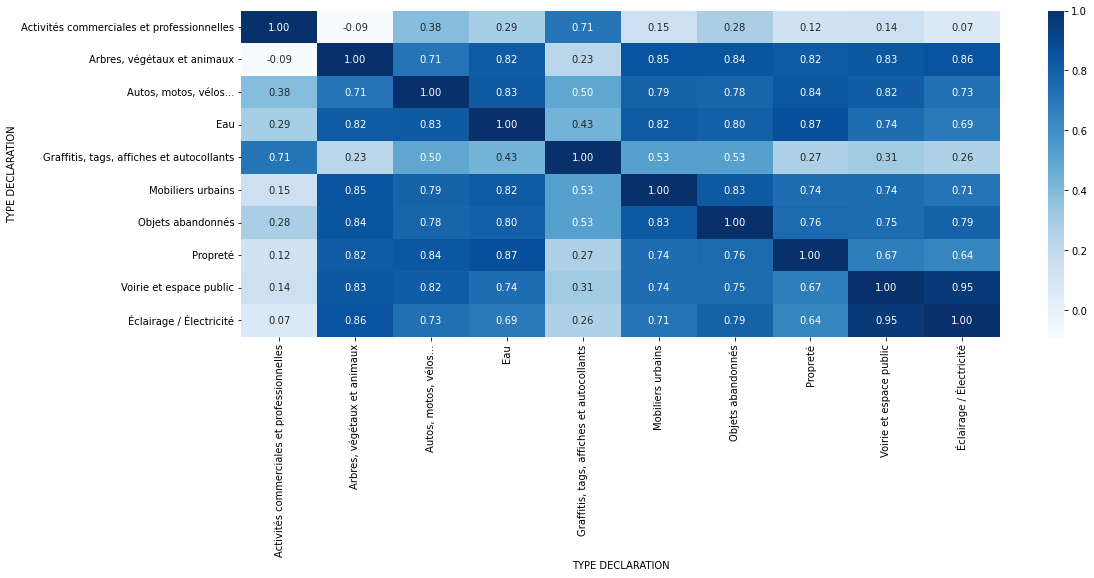

In [34]:
plt.figure(figsize=(17,6))
sns.heatmap(dmr_arr.corr(),annot=True,cbar=True,cmap='Blues',fmt='.2f')
plt.show()

<br><b>Déclarations par type et par arrondissement : un graphique par anomalie

Nous produisons ici une boucle afin de produire automatiquement autant d'histogrammes des signalements par arrondissement qu'il y a de types de problèmes.


 Déclarations par type d'anomalies et par arrondissement 



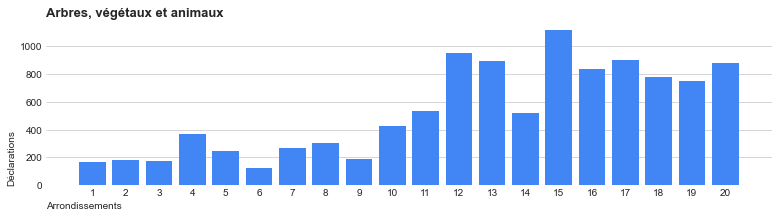

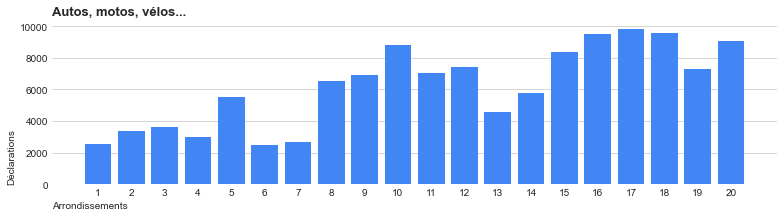

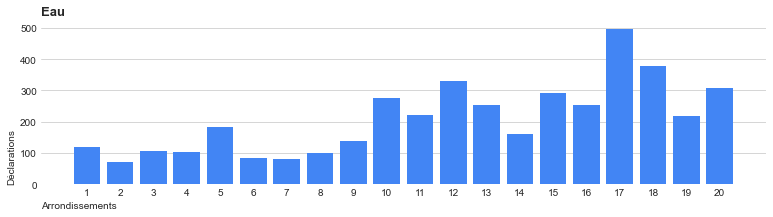

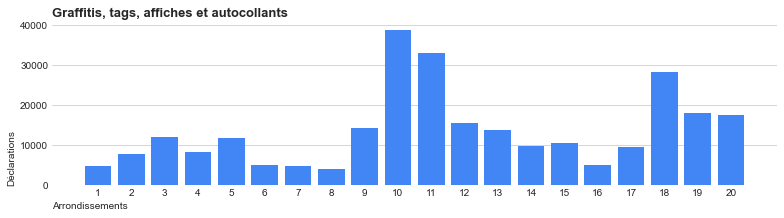

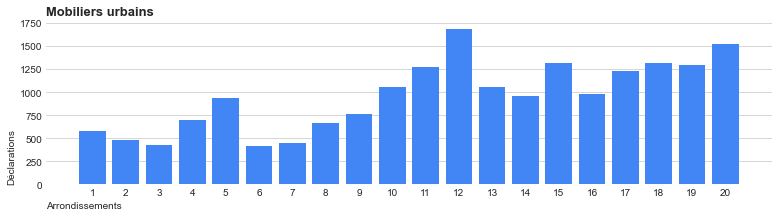

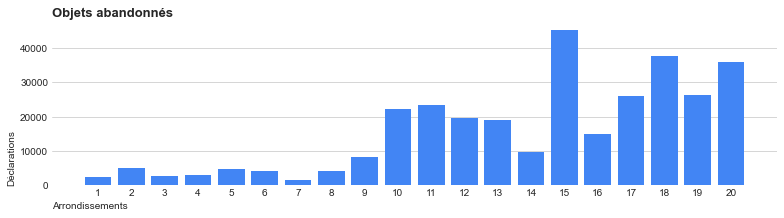

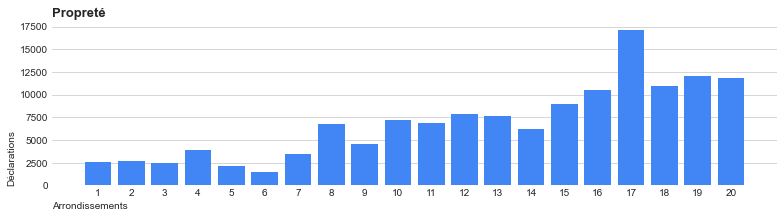

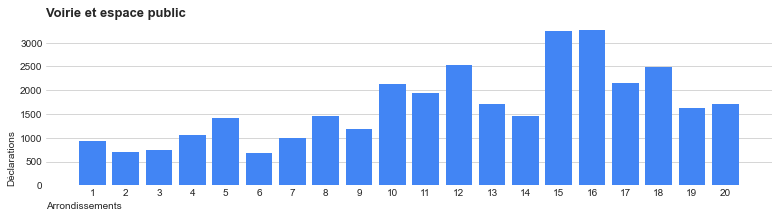

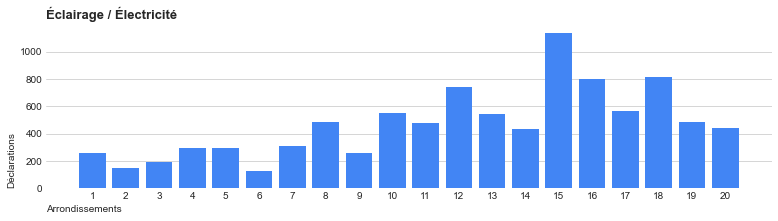

In [35]:
print('\n Déclarations par type d\'anomalies et par arrondissement \n')

for col in range(1,len(dmr_arr.columns)):
    
    plt.style.use('seaborn-white')
    
    fig = plt.figure(figsize=(13,3))
    ax = fig.add_subplot(111)

    ax.bar(range(len(dmr_arr.iloc[:,col])),
           dmr_arr.iloc[:,col], color='#4285f4')

    tick_positions = range(0,len(dmr_arr))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(dmr_arr.index)
    
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.grid(axis='y')

    plt.xlabel('Arrondissements', loc='left')
    plt.ylabel('Déclarations', loc='bottom')

    ax.set_title(dmr_arr.columns[col],
                  fontsize=13,
                  fontweight='bold',
                  loc='left')

    plt.show()
    
    print('\n')

<b>Déclarations par type et par arrondissement : graphique de synthèse

Nous produisons un histogramme de synthèse cumulant les anomalies par arrondissement.

Pour éviter une surcharge visuelle préjudiciable à l'analyse, nous aggrégeons dans une catégorie <b>"Autres"</b> les anomalies donnant lieu à peu d'alertes .

Dans un premier temps, nous classons les types d'anomalies par ordre d'importance (suivant leur volume). 

In [36]:
sort_decl = dmr_arr.mean().sort_values(ascending=False)
sort_decl = sort_decl.index.tolist()
sort_decl

['Objets abandonnés',
 'Graffitis, tags, affiches et autocollants',
 'Propreté',
 'Autos, motos, vélos...',
 'Activités commerciales et professionnelles',
 'Voirie et espace public',
 'Mobiliers urbains',
 'Arbres, végétaux et animaux',
 'Éclairage / Électricité',
 'Eau']

Ensuite, nous créons deux tableaux Pandas que nous fusionnons : 
- l\'un avec les 4 premiers types d'anomalies (top_decl)
- l'autre avec notre nouvelle catégorie "Autres" (autres_decl)

In [37]:
top_decl = dmr_arr[sort_decl[:4]]
autres_decl = dmr_arr[sort_decl[4:]].sum(axis=1)
dmr_arr2 = pd.concat([top_decl,autres_decl],axis=1)
dmr_arr2.rename(columns={0:'Autres'}, inplace=True )
dmr_arr2.head()

,Objets abandonnés,"Graffitis, tags, affiches et autocollants",Propreté,"Autos, motos, vélos...",Autres
ARRONDISSEMENT,,,,,
1,2393,4947,2558,2521,3916
2,5023,7707,2696,3374,4923
3,2697,11995,2407,3633,2852
4,3049,8213,3913,3013,3847
5,4698,11947,2142,5545,4312


A présent, nous pouvons éditer l\'histogramme de synthèse.

Nous observons que l'écart de déclarations entre les arrondissements du centre et ceux périphériques s'explique avant tout par les signalements de graffitis et d'objets abandonnés.

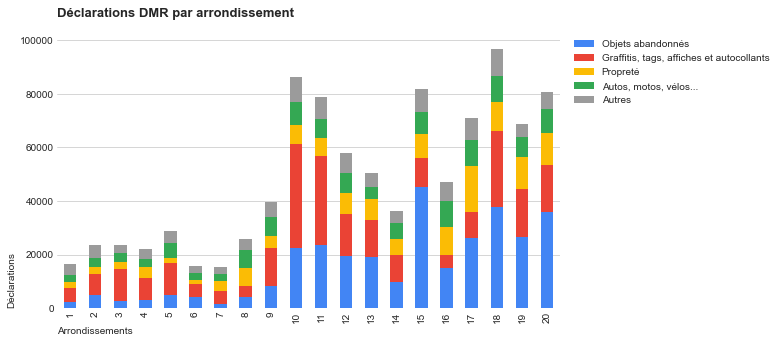

In [38]:
dmr_arr2.plot(kind='bar',
             stacked=True,
             figsize=(9,5),
             color=my_colors)\
            .spines[['right','top','left','bottom']].set_visible(False)

plt.title('Déclarations DMR par arrondissement \n', 
          fontsize=13,
          fontweight='bold',
          loc='left')

plt.grid(axis='y')
plt.xlabel('Arrondissements', loc='left')
plt.ylabel('Déclarations', loc='bottom')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

<br><h1><font color=#FF2052>6. Observation des évolutions

<h2><font color=#01C7BE>Evolutions à l'échelle de la capitale

Pour rappel, la base couvre la période allant d'avril 2021 à mai 2022, soit 394 jours. Nous observons l'évolution des déclarations au cours de cette période.

A partir de la colonne DATE DECLARATION qui renseigne l'année, le mois et le jour des déclarations, nous créons une colonne <b>ANNEE_MOIS</b> indiquant seulement l'année et le mois.

In [39]:
dmr['ANNEE_MOIS'] = dmr['DATE DECLARATION'].dt.to_period('m')

Pour plus de lisibilité, nous créons une colonne simplifiée des types d'anomalies (TYPE DECL SIMPL). Celles-ci aggrege les anomalies faisant l'objet de peu de signalements sous une catégorie "Autres"

In [40]:
dmr['TYPE DECL SIMPL'] = dmr['TYPE DECLARATION'].replace([
        
        'Activités commerciales et professionnelles',
        'Voirie et espace public',
        'Mobiliers urbains',
        'Arbres, végétaux et animaux',
        'Éclairage / Électricité',
        'Eau']
                                                         
        ,'Autres')

Nous créons à présent un tabeau avec :
- en lignes, les dates (ANNEE_MOIS)
- en colonnes, nos types simplifiés d'anomalies

Nous ajoutons une colonne "Total".

In [41]:
dmr_date = pd.pivot_table(dmr[['ANNEE_MOIS','TYPE DECL SIMPL']],
                         index='ANNEE_MOIS',
                         columns='TYPE DECL SIMPL',
                         aggfunc=len)

dmr_date['Total'] = dmr_date.sum(axis=1)

dmr_date.head()

TYPE DECL SIMPL,"Autos, motos, vélos...",Autres,"Graffitis, tags, affiches et autocollants",Objets abandonnés,Propreté,Total
ANNEE_MOIS,,,,,,
2021-04,2240,1475,5039,4811,1921,15486
2021-05,10258,8385,22974,24052,9056,74725
2021-06,13582,10924,21684,28028,9847,84065
2021-07,9728,10086,19596,29889,9332,78631
2021-08,5750,6941,21094,24237,8726,66748


Nous savons que les premier et dernier mois de la base (avril 2021 et mai 2022) sont ne sont que partiellement couverts. Aussi, nous les retirons de l'analyse.

In [42]:
dmr_date.drop(['2021-04','2022-05'], inplace=True)

<br><b>Evolution des déclarations à Paris : un graphique par anomalie

Nous produisons ici une boucle afin de produire automatiquement autant de graphiques d'évolution qu'il y a de types d'anomalies.

Les premières observations sont les suivantes :

- Les déclarations mensuelles, quelle que soit l'anomalie considérée, sont plutôt volatiles.

- Sur la période étudiée, nous ne decellons pas d'augmentation tendancielle des signalements.

- Les déclarations d'objets abandonnés (première source de signalements) ont eux tendanciellement baissé.

- Après un mois d'août 2021 relativement calme, on relève d'un pic soudain et marqué des signalements en septembre 2021 pour toutes les anomalies.


 Evolution des signalements 



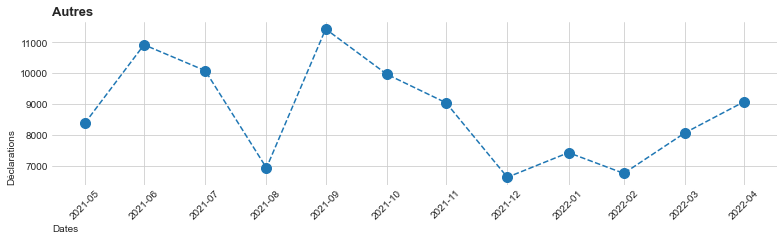

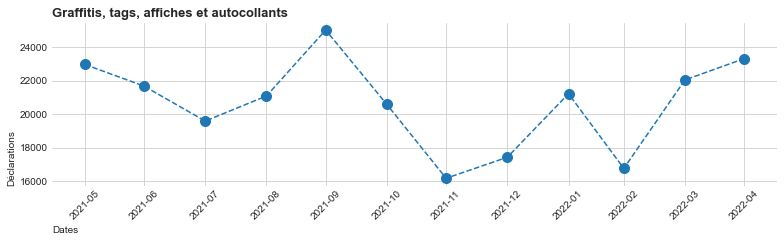

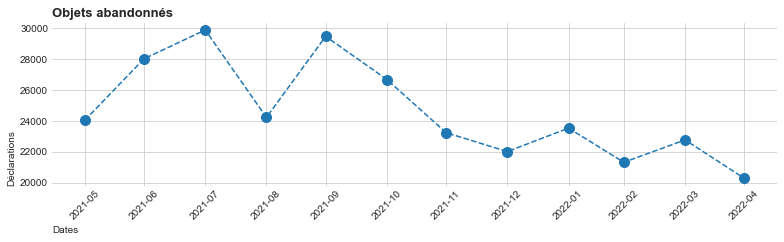

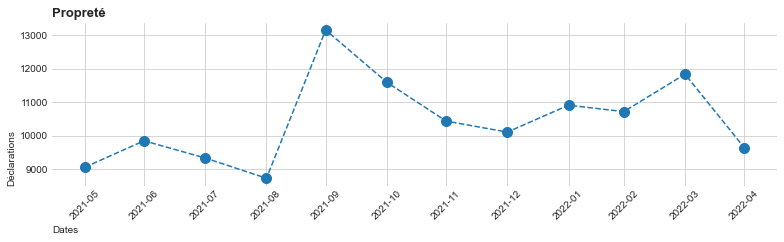

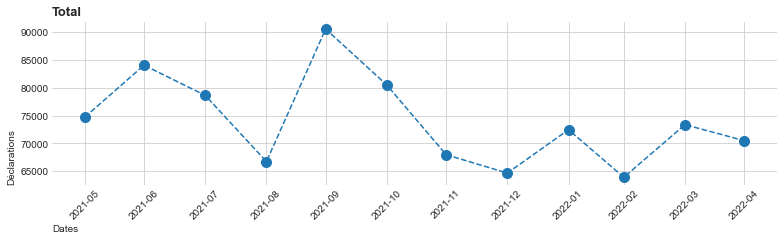

In [43]:
print('\n Evolution des signalements \n')

for col in range(1,len(dmr_date.columns)):
    
    plt.style.use('seaborn-white')
    
    fig = plt.figure(figsize=(13,3))
    ax = fig.add_subplot(111)

    ax.plot_date(dmr_date.index, dmr_date.iloc[:,col], markersize = 10, linestyle='dashed')
    
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.grid()
    
    plt.xticks(dmr_date.index, dmr_date.index, rotation='45')

    plt.xlabel('Dates', loc='left')
    plt.ylabel('Déclarations', loc='bottom')

    ax.set_title(dmr_date.columns[col],
                  fontsize=13,
                  fontweight='bold',
                  loc='left')

    plt.show()
    
    print('\n')

<br><b>Evolution des déclarations à Paris : graphique de synthèse

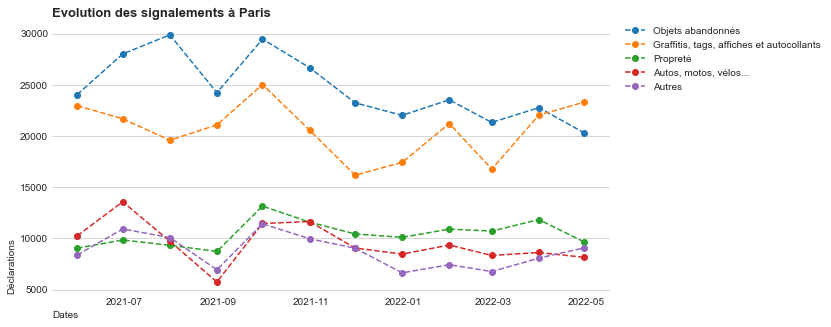

In [44]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
    
ax.plot_date(dmr_date.index, dmr_date['Objets abandonnés'], label='Objets abandonnés', linestyle='dashed')
ax.plot_date(dmr_date.index, dmr_date['Graffitis, tags, affiches et autocollants'], label='Graffitis, tags, affiches et autocollants', linestyle='dashed')
ax.plot_date(dmr_date.index, dmr_date['Propreté'], label='Propreté', linestyle='dashed')
ax.plot_date(dmr_date.index, dmr_date['Autos, motos, vélos...'], label='Autos, motos, vélos...', linestyle='dashed')
ax.plot_date(dmr_date.index, dmr_date['Autres'], label='Autres', linestyle='dashed')

ax.spines[['top','right','bottom','left']].set_visible(False)
ax.grid(axis='y')
    
plt.xlabel('Dates', loc='left')
plt.ylabel('Déclarations', loc='bottom')

ax.set_title('Evolution des signalements à Paris',
                 fontsize=13,
                 fontweight='bold',
                 loc='left')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

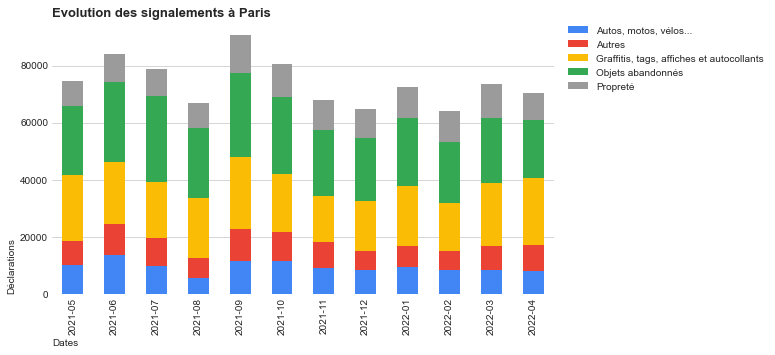

In [45]:
dmr_date.iloc[:,:5].plot(kind='bar',
                         stacked=True,
                         figsize=(9,5),
                         color=my_colors)\
                    .spines[['right','top','left','bottom']].set_visible(False)

plt.title('Evolution des signalements à Paris', 
          fontsize=13,
          fontweight='bold',
          loc='left')

plt.grid(axis='y')
plt.xlabel('Dates', loc='left')
plt.ylabel('Déclarations', loc='bottom')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

<h2><font color=#01C7BE>Observation à l'échelle des arrondissements

Nous produisons un dataframe avec les dates en lignes et les anomalies par arrondissement en colonnes. Comme auparavant, nous supprimons le premier et le dernier mois de la série (s'agissant de mois incomplets)

In [46]:
dmr_date_arr = pd.pivot_table(dmr[['ANNEE_MOIS','TYPE DECL SIMPL','ARRONDISSEMENT']],
                         index='ANNEE_MOIS',
                         columns=['ARRONDISSEMENT','TYPE DECL SIMPL'],
                         aggfunc=len)

dmr_date_arr.drop(['2021-04','2022-05'], inplace=True)

pd.set_option('display.max_columns', None) 
dmr_date_arr.head()

ARRONDISSEMENT                      1          \
TYPE DECL SIMPL Autos, motos, vélos... Autres   
ANNEE_MOIS                                      
2021-05                            231    292   
2021-06                            311    319   
2021-07                            196    356   
2021-08                            119    247   
2021-09                            247    458   

ARRONDISSEMENT                                                               \
TYPE DECL SIMPL Graffitis, tags, affiches et autocollants Objets abandonnés   
ANNEE_MOIS                                                                    
2021-05                                               354               163   
2021-06                                               390               230   
2021-07                                               327               227   
2021-08                                               219               179   
2021-09                                               404               267   

ARRONDISSEMENT                               2          \
TYPE DECL SIMPL Propreté Autos, motos, vélos... Autres   
ANNEE_MOIS                                               
2021-05              143                    212    299   
2021-06              206                    384    450   
2021-07              214                    258    538   
2021-08              156                    233    283   
2021-09              221                    362    648   

ARRONDISSEMENT                                                               \
TYPE DECL SIMPL Graffitis, tags, affiches et autocollants Objets abandonnés   
ANNEE_MOIS                                                                    
2021-05                                               375               181   
2021-06                                               427               399   
2021-07                                               363               446   
2021-08                                               551               412   
2021-09                                               685               649   

ARRONDISSEMENT                               3          \
TYPE DECL SIMPL Propreté Autos, motos, vélos... Autres   
ANNEE_MOIS                                               
2021-05              124                    389    220   
2021-06              201                    416    265   
2021-07              178                    262    288   
2021-08              174                    145    174   
2021-09              332                    267    303   

ARRONDISSEMENT                                                               \
TYPE DECL SIMPL Graffitis, tags, affiches et autocollants Objets abandonnés   
ANNEE_MOIS                                                                    
2021-05                                               916               162   
2021-06                                               906               270   
2021-07                                               940               253   
2021-08                                               845               208   
2021-09                                              1088               269   

ARRONDISSEMENT                               4          \
TYPE DECL SIMPL Propreté Autos, motos, vélos... Autres   
ANNEE_MOIS                                               
2021-05              134                    290    339   
2021-06              197                    309    382   
2021-07              172                    305    352   
2021-08              128                    155    285   
2021-09              167                    287    431   

ARRONDISSEMENT                                                               \
TYPE DECL SIMPL Graffitis, tags, affiches et autocollants Objets abandonnés   
ANNEE_MOIS                                                                    
2021-05                                               614               231 

<br><b>Evolution des déclarations pour un arrondissement sélectionné : un graphique par anomalie

Nous créons la fonction <b>graph_date_arr()</b>.
<br>Elle prend un unique argument : le numéro d'arrondissement.
<br>Elle produit une série de graphiques sur l'évolution des déclarations par anomalie pour l'arrondissement sélectionné.

In [47]:
def graph_date_arr(num_arr):
    
    df = dmr_date_arr[num_arr]
    
    for col in range(0,5):
    
        plt.style.use('seaborn-white')
    
        fig = plt.figure(figsize=(13,3))
        ax = fig.add_subplot(111)

        ax.plot_date(df.index, df.iloc[:,col], markersize = 10, linestyle='dashed')
    
        ax.spines[['top','right','bottom','left']].set_visible(False)
        ax.grid()
    
        plt.xticks(df.index, df.index, rotation='45')

        plt.xlabel('Dates', loc='left')
        plt.ylabel('Déclarations', loc='bottom')
        
        title = ['Paris ',num_arr, ' / ',df.columns[col]]
        title = ' '.join(map(str,title))        
       
        ax.set_title(title,
                     fontsize=13,
                     fontweight='bold',
                     loc='left')
        
    return plt.show()

Ainsi, pour le 12<sup>ème</sup> arrondissement, cela donne :

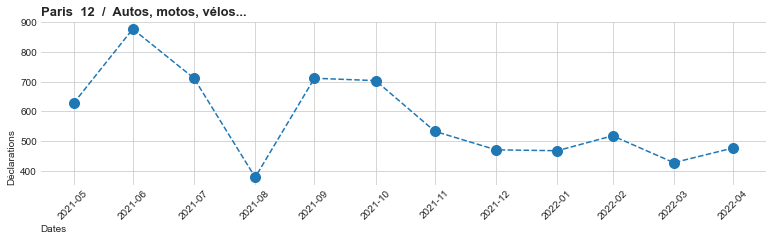

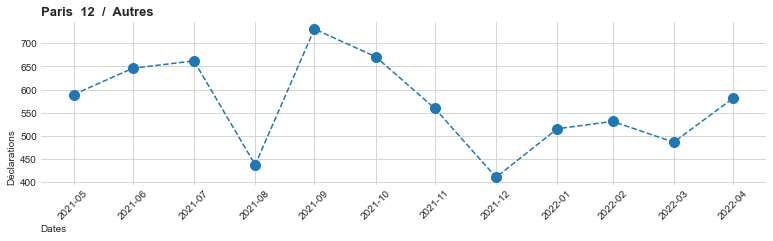

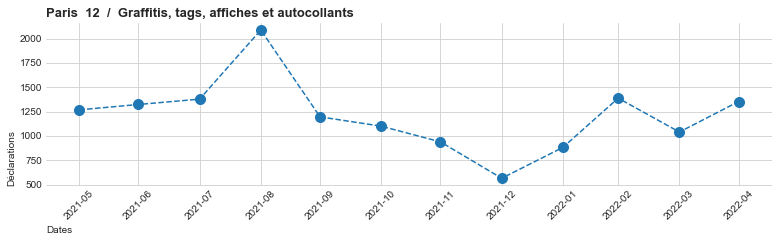

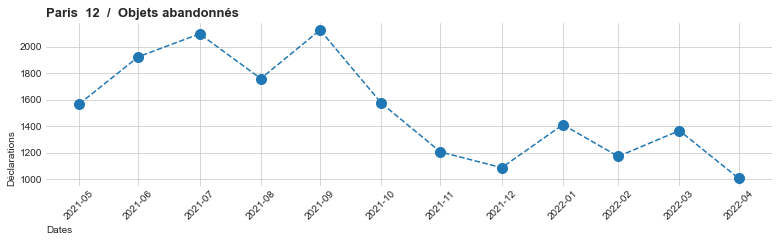

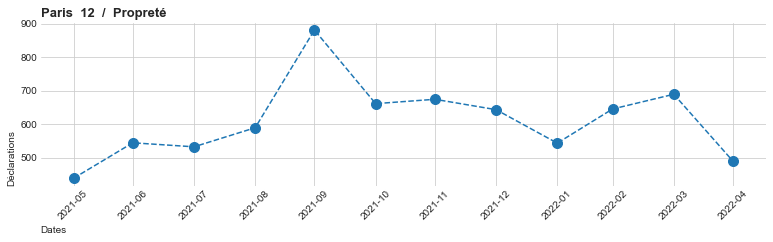

In [48]:
graph_date_arr(12)

<br><b>Evolution des déclarations pour un arrondissement sélectionné : graphique de synthèse

Pour produire nos deux graphiques de synthèse au niveau d'un arrondissement donné, nous réutilisons le code édité pour les synthèses à l'échelle de la capitale et nous l'incluons dans une fonction permettant de spécifier l'arrondissement en question.

Nous créons ainsi les fonctions :
- graph_date_arr_synth_1() 
- graph_date_arr_synth_2() 

In [49]:
def graph_date_arr_synth_1(num_arr):
    
    df = dmr_date_arr[num_arr]
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    ax.plot_date(df.index, df['Objets abandonnés'], label='Objets abandonnés', linestyle='dashed')
    ax.plot_date(df.index, df['Graffitis, tags, affiches et autocollants'], label='Graffitis, tags, affiches et autocollants', linestyle='dashed')
    ax.plot_date(df.index, df['Propreté'], label='Propreté', linestyle='dashed')
    ax.plot_date(df.index, df['Autos, motos, vélos...'], label='Autos, motos, vélos...', linestyle='dashed')
    ax.plot_date(df.index, df['Autres'], label='Autres', linestyle='dashed')

    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.grid(axis='y')
    
    plt.xlabel('Dates', loc='left')
    plt.ylabel('Déclarations', loc='bottom')

    title = ['Evolution des signalements à Paris ',num_arr]
    title = ' '.join(map(str,title)) 
    
    ax.set_title(title,\
                 fontsize=13, \
                 fontweight='bold',\
                 loc='left')

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    return plt.show()

Pour le 12<sup>ème</sup> arrondissement, cela donne :

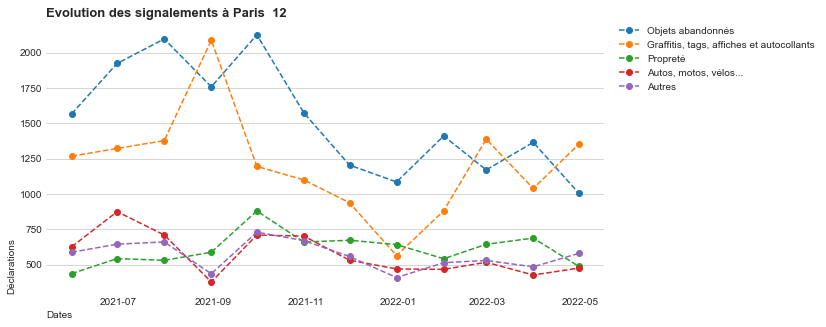

In [50]:
graph_date_arr_synth_1(12)

In [51]:
def graph_date_arr_synth_2(num_arr):
    
    df = dmr_date_arr[num_arr]
    
    df.iloc[:,:5].plot(kind='bar',
                        stacked=True,
                        figsize=(9,5),
                        color=my_colors)\
                .spines[['right','top','left','bottom']].set_visible(False)
    
    title = ['Evolution des signalements à Paris ',num_arr]
    title = ' '.join(map(str,title)) 
    
    plt.title(title,
        fontsize=13,
        fontweight='bold',
        loc='left')
    
    plt.grid(axis='y')
    plt.xlabel('Dates', loc='left')
    plt.ylabel('Déclarations', loc='bottom')

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    return plt.show()

Pour le 12<sup>ème</sup> arrondissement, cela donne :

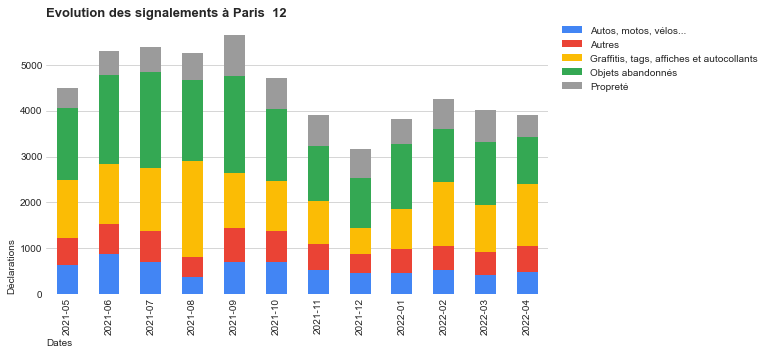

In [52]:
graph_date_arr_synth_2(12)

<br><h1><font color=#FF2052>7. Relation avec les données démographiques et économiques des arrondissements

Nous avons réalisé une sélection de données démographiques et économiques à l'échelle des arrondissements parisiens. Ces données proviennent du Comparateur de territoires de l'Insee. Elles vont nous permettre d'observer la présence ou non d'une relation, à l'échelle des arrondissements, entre l'utilisation de l'application DansMaRue et la démographie / niveau de revenu.

Notre jeu de données comprend 10 indicateurs :

In [53]:
data_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Population, 2019                              20 non-null     float64
 1   Densité de la population, 2019                20 non-null     float64
 2   Superficie en 2019, km2                       20 non-null     float64
 3   Part ménages imposés, 2019, %                 20 non-null     float64
 4   Médiane du revenu disponible par UC, 2019, €  20 non-null     float64
 5   Taux de pauvreté, 2019, %                     20 non-null     float64
 6   Emploi total au lieu de travail, 2019         20 non-null     float64
 7   Taux de chômage, 15-64 ans, 2019              20 non-null     float64
 8   Etablissements actifs, fin 2019               20 non-null     float64
dtypes: float64(9)
memory usage: 1.6 KB


Nous proposons des noms de colonnes plus courts afin de favoriser la clareté des visualisations à venir.

In [54]:
data_arr.rename(columns = {
    'Population, 2019': 'POP',
    'Densité de la population, 2019': 'DENSITE_POP',
    'Superficie en 2019, km2': 'KM2',
    'Part ménages imposés, 2019, %': 'MENAGES_IR',
    'Médiane du revenu disponible par UC, 2019, €': 'REVENU_MED',
    'Taux de pauvreté, 2019, %': 'PAUVRETE',
    'Emploi total au lieu de travail, 2019': 'EMPLOI',
    'Taux de chômage, 15-64 ans, 2019': 'CHOMAGE',
    'Etablissements actifs, fin 2019': 'ENTREPRISES'
         },inplace=True)

En guide d'aperçu, observons les valeurs pour les 3 premiers arrondissements.

In [55]:
data_arr.head(3)

Arrondissements,POP,DENSITE_POP,KM2,MENAGES_IR,REVENU_MED,PAUVRETE,EMPLOI,CHOMAGE,ENTREPRISES
1,15917.0,8697.8,1.8,77.0,34720.0,11.0,66049.0,10.5,6390.0
2,21595.0,21813.1,1.0,76.0,32650.0,14.0,65082.0,9.7,6977.0
3,34025.0,29081.2,1.2,77.0,33570.0,12.0,32029.0,10.0,4858.0


Voyons à présent quelques statistiques descriptives.

In [56]:
data_arr.describe().round()

Arrondissements,POP,DENSITE_POP,KM2,MENAGES_IR,REVENU_MED,PAUVRETE,EMPLOI,CHOMAGE,ENTREPRISES
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,108271.0,22696.0,5.0,75.0,32116.0,14.0,92306.0,11.0,8822.0
std,71424.0,9087.0,4.0,4.0,6577.0,4.0,42173.0,2.0,4150.0
min,15917.0,8535.0,1.0,65.0,21460.0,8.0,32029.0,8.0,3713.0
25%,39141.0,16643.0,2.0,74.0,28312.0,11.0,65807.0,10.0,6432.0
50%,111032.0,24608.0,4.0,76.0,32025.0,13.0,83156.0,10.0,7068.0
75%,169908.0,29154.0,6.0,77.0,35010.0,14.0,119645.0,11.0,10836.0
max,230981.0,39566.0,16.0,80.0,44400.0,22.0,187392.0,16.0,21130.0


A cette base, nous ajoutons une colonne renseignant pour chaque arrondissement le nombre de signalements DansMaRue entre avril 2021 et mai 2022. Cette information est contenue dans la variable "par_arr", créée au début de ce notebook.

"par_arr" affiche, par ordre décroissant, le nombre d'alertes par arrondissement. En vue d'une intégration au tableau ici traité, nous ordonnons ces données par numéro d'arrondissement, du 1<sup>er</sup> jusqu'au 20<sup>ème</sup>.

In [57]:
# Rappel de par_arr (5 premières valeurs) : classement des lignes suivant le nombre d'alertes
par_arr.head()

,Total,%
18,96682,10.0
10,86422,9.0
15,81788,8.0
20,80704,8.0
11,78780,8.0


In [58]:
# Création d'un classement par n° d'arrondissment
par_arr_2 = par_arr['Total']
par_arr_2.sort_index(inplace=True)
par_arr_2.head()

1    16335
2    23723
3    23584
4    22035
5    28644
Name: Total, dtype: int64

In [59]:
# Ajout des alertes DMR dans notre tableau
data_arr['DMR'] = par_arr_2

In [60]:
# 5ème premières lignes du nouveau tableau
data_arr.head()

Arrondissements,POP,DENSITE_POP,KM2,MENAGES_IR,REVENU_MED,PAUVRETE,EMPLOI,CHOMAGE,ENTREPRISES,DMR
1,15917.0,8697.8,1.8,77.0,34720.0,11.0,66049.0,10.5,6390.0,16335
2,21595.0,21813.1,1.0,76.0,32650.0,14.0,65082.0,9.7,6977.0,23723
3,34025.0,29081.2,1.2,77.0,33570.0,12.0,32029.0,10.0,4858.0,23584
4,29131.0,18206.9,1.6,76.0,31840.0,13.0,41494.0,11.2,3713.0,22035
5,58227.0,22924.0,2.5,77.0,34520.0,11.0,53063.0,9.1,4715.0,28644


Pour appréhender les liens potentiels entre ces différents indicateurs , nous réalisons :
- une matrice de nuages de points,
- puis une matrice des coefficients de coorélation.

La dernière ligne de ces matrices permet d'observer les liens poteniels entre les alertes DMR et les indicateurs démographiques et économiques des arrondissements. Nous en tirons trois observations :
- Une relation positive transparaît avec le nombre d'habitants (coefficient de corrélation : 0,82) et, dans une moindre mesure, avec la densité (0,64).
- Les alertes tendent à être moins nombreuses lorsque la richesse des arrondissements est élevée. Ce fait peut être constaté avec l'indicateur du revenu médiant (-0,69) comme avec celui du taux de pauvreté (0,73).
- La superficie des arrondissements ne semble pas affecter le volume d'alertes.

A noter : la diagonale de cette matrice indique que nos séries ne suivent pas la loi normale.

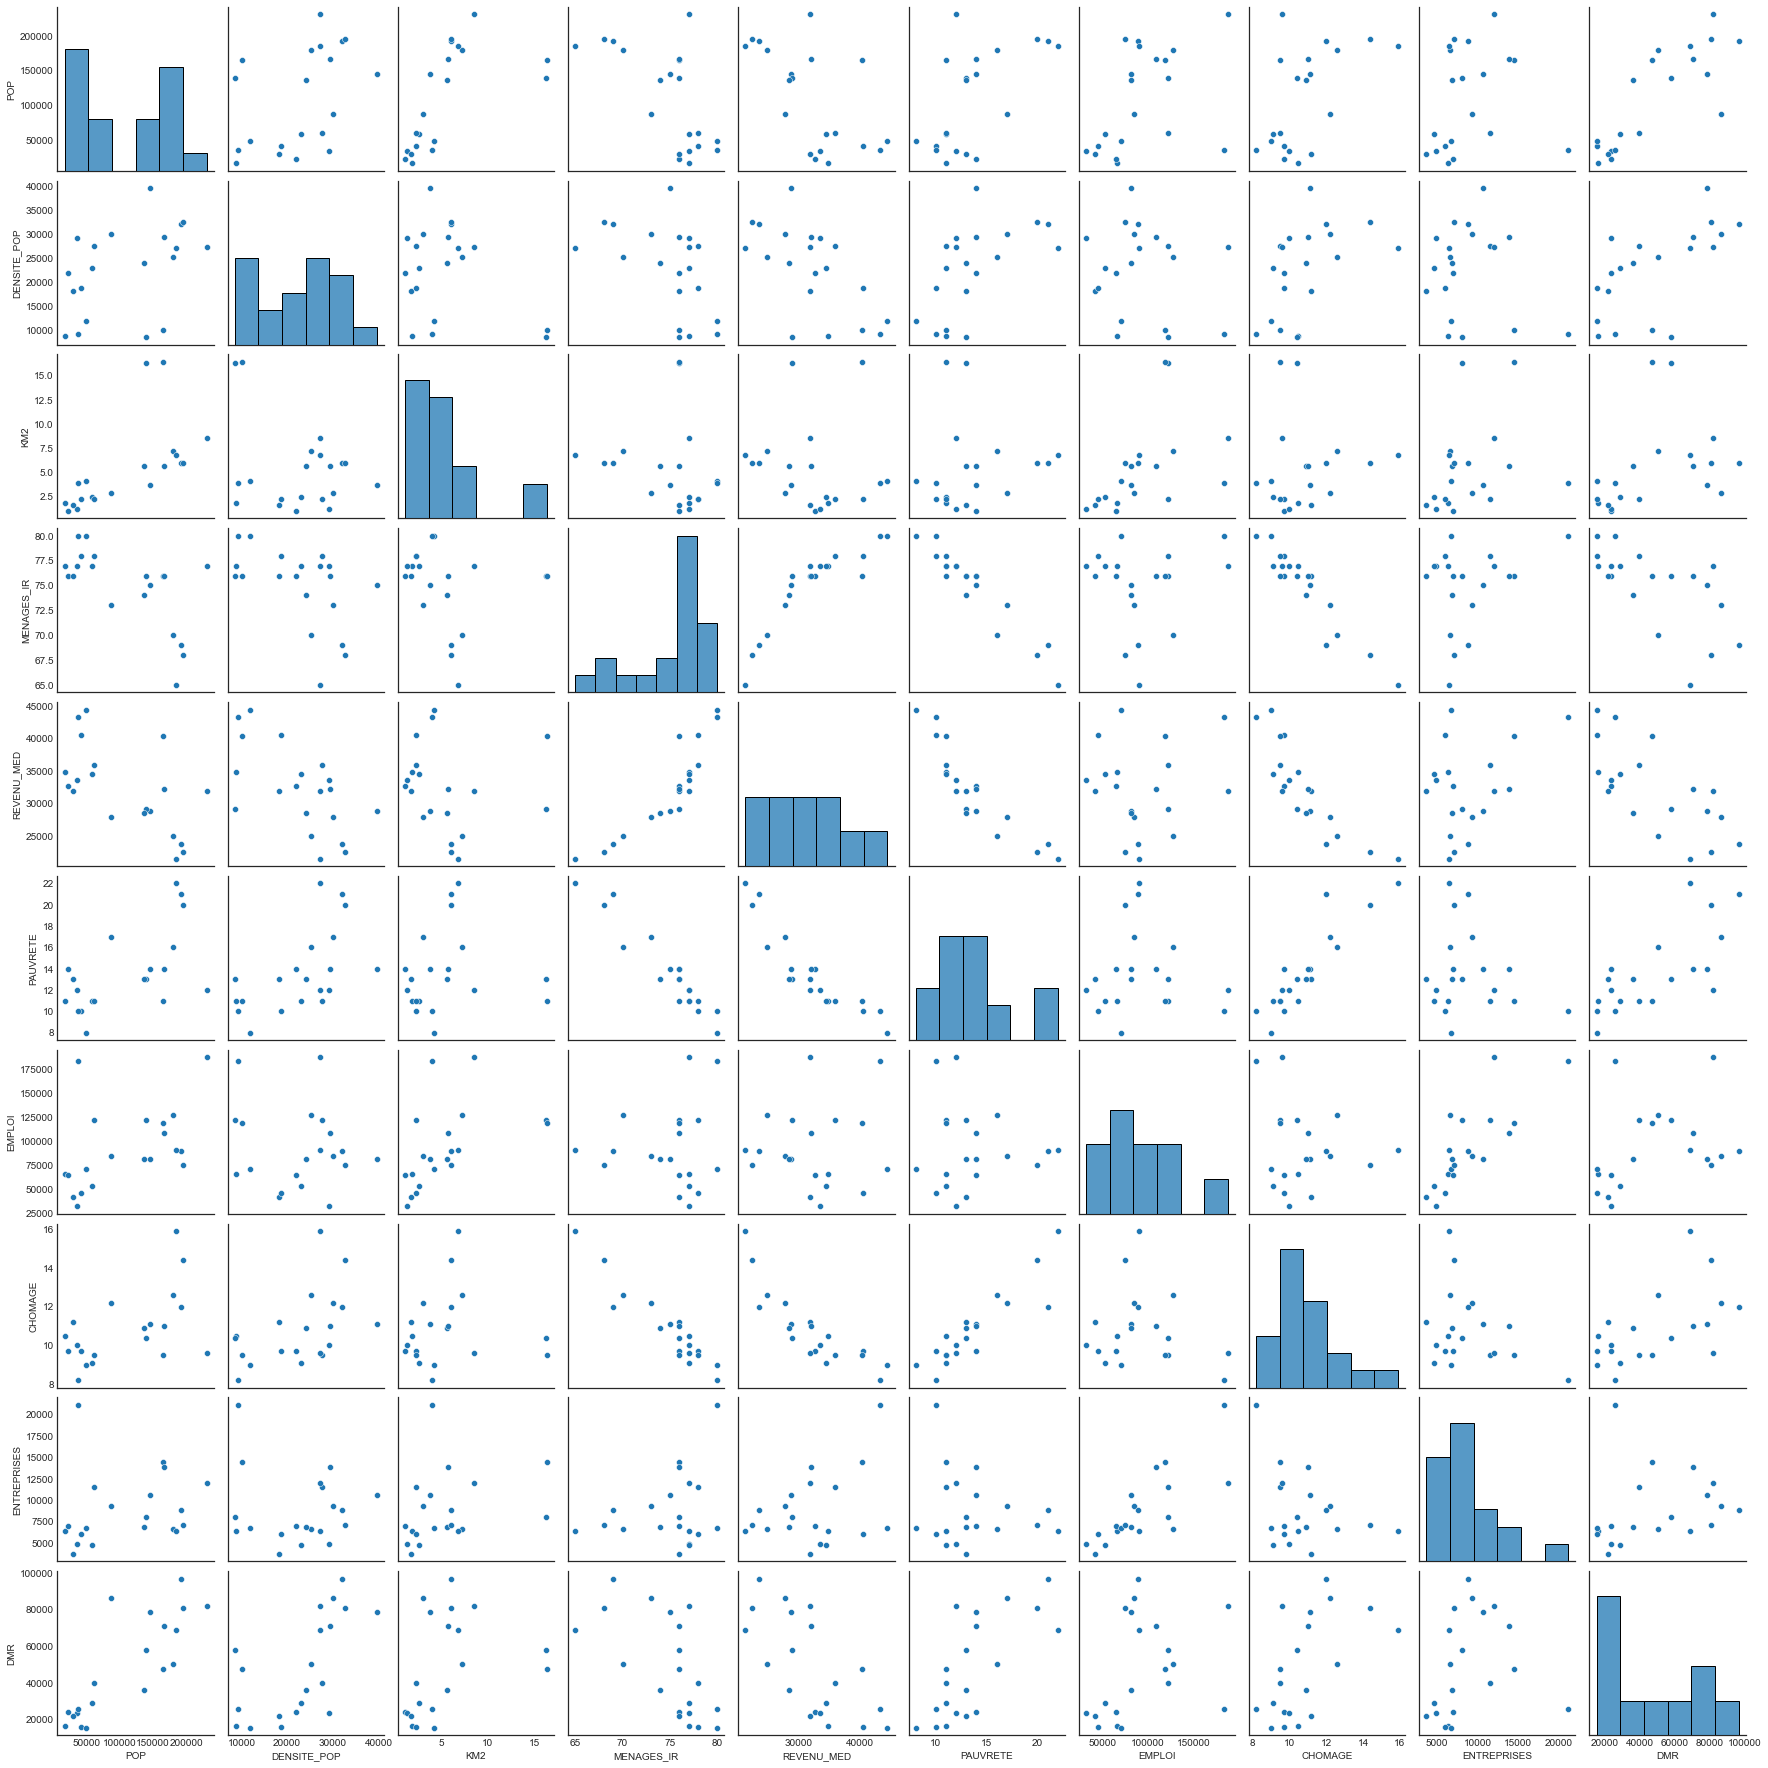

In [61]:
sns.pairplot(data_arr)

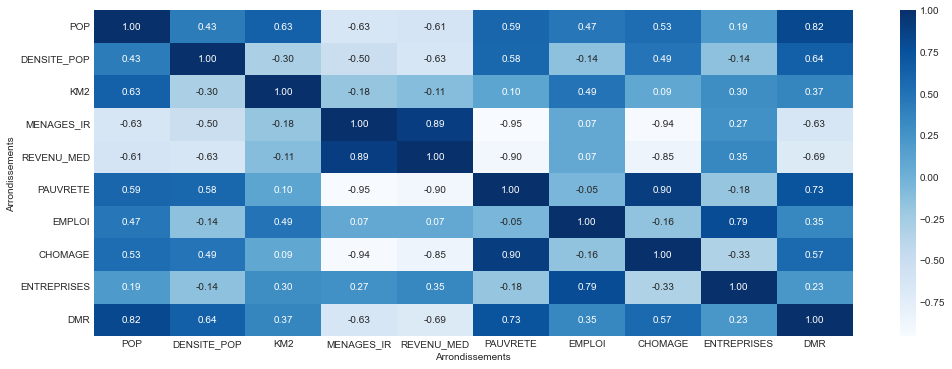

In [62]:
plt.figure(figsize=(17,6))
sns.heatmap(data_arr.corr(),annot=True,cbar=True,cmap='Blues',fmt='.2f')
plt.show()

Réalisons à présent un zoom sur les deux nuages de points qui nous interessent le plus :
- Alertes DMR et population
- Alertes DMR et taux de pauvreté

DMR et population


C:\Users\33662\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


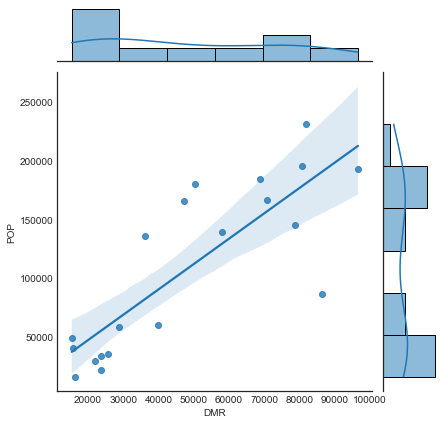

In [63]:
print('\033[1m' +'DMR et population')
sns.jointplot('DMR', 'POP', data_arr, kind='reg')

DMR et pauvreté


C:\Users\33662\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


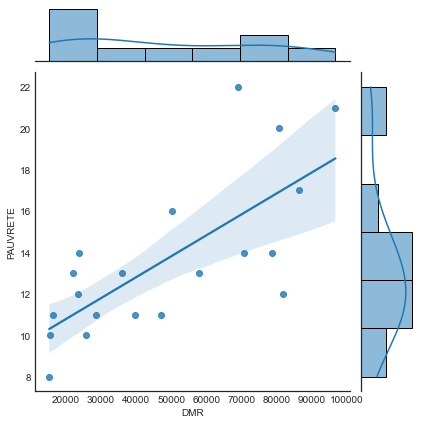

In [66]:
print('\033[1m' +'DMR et pauvreté')
sns.jointplot('DMR', 'PAUVRETE', data_arr, kind='reg')

A ce stade, il serait interessant de procéder à un calcul économétrique pour observer l'impact, toutes choses égales par ailleurs, de la démographie d'une part et du niveau de richesse d'autre part. Au regard des coefficients de coorélation obtenus, nous pourrions retenir pour cela la population et le taux de pauvreté.

Nous nous abstenons toutefois de poursuivre avec un calcul économétrique pour les raisons suivantes :
- Nos séries sont limitées aux 20 arrondissements, ce qui ne constitue pas suffisamment d'observations pour mener une analyse rigoureuse.
- Notamment, nous observons que nos séries d'intérêt, DMR, POP et PAUVRETE ne suivent pas une loi normale à l'échelle des arrondissements.
- Enfin, nous ne pourrions utiliser ensemble dans un même modèle les indicateurs de population et de pauvreté car ceux-ci sont corrélés, avec un indice de Pearson à 0,59.

In [76]:
corr, _ = pearsonr(data_arr['POP'], data_arr['PAUVRETE'])
print('Corrélation de Pearson entre POP et PAUVRETE : %.3f' % corr)

Corrélation de Pearson entre POP et PAUVRETE : 0.589


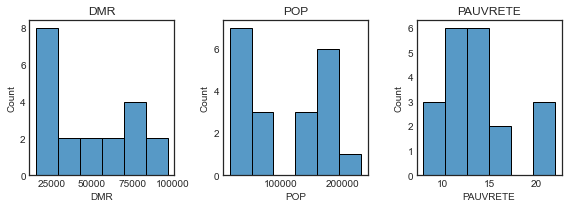

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(8,3))

sns.histplot(data_arr['DMR'], ax=ax1).set(title='DMR')
sns.histplot(data_arr['POP'], ax=ax2).set(title='POP')
sns.histplot(data_arr['PAUVRETE'], ax=ax3).set(title='PAUVRETE')

plt.tight_layout()